In [22]:
#Calling all the library which are required for developing classification model

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as imbpipeline

from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
Data = pd.read_csv("Coursework_1_data.csv")
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [24]:
pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False) 

print('\nE-commerce Visitor \n', Data.head(10))

print('\Statistics of the E-commerce Visitor dataset\n', Data.describe())


E-commerce Visitor 
    Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  Browser  Region  TrafficType        VisitorType  Weekend  Revenue
0               0                      0.0              0                     0.0               1                 0.000000     0.200000   0.200000         0.0         0.0   Feb                 1        1       1            1  Returning_Visitor    False    False
1               0                      0.0              0                     0.0               2                64.000000     0.000000   0.100000         0.0         0.0   Feb                 2        2       1            2  Returning_Visitor    False    False
2               0                      0.0              0                     0.0               1                 0.000000     0.200000   0.200000         0.0         0.0   Feb                

In [25]:
#CHECKING MISSING DATA
Data.isna().sum() 

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [26]:
#Converting Boolean data into 1 for true or 0 for false
Data['Revenue'] = Data['Revenue'].replace((True, False), (1, 0))
Data['Weekend'] = Data['Weekend'].replace((True, False), (1, 0))

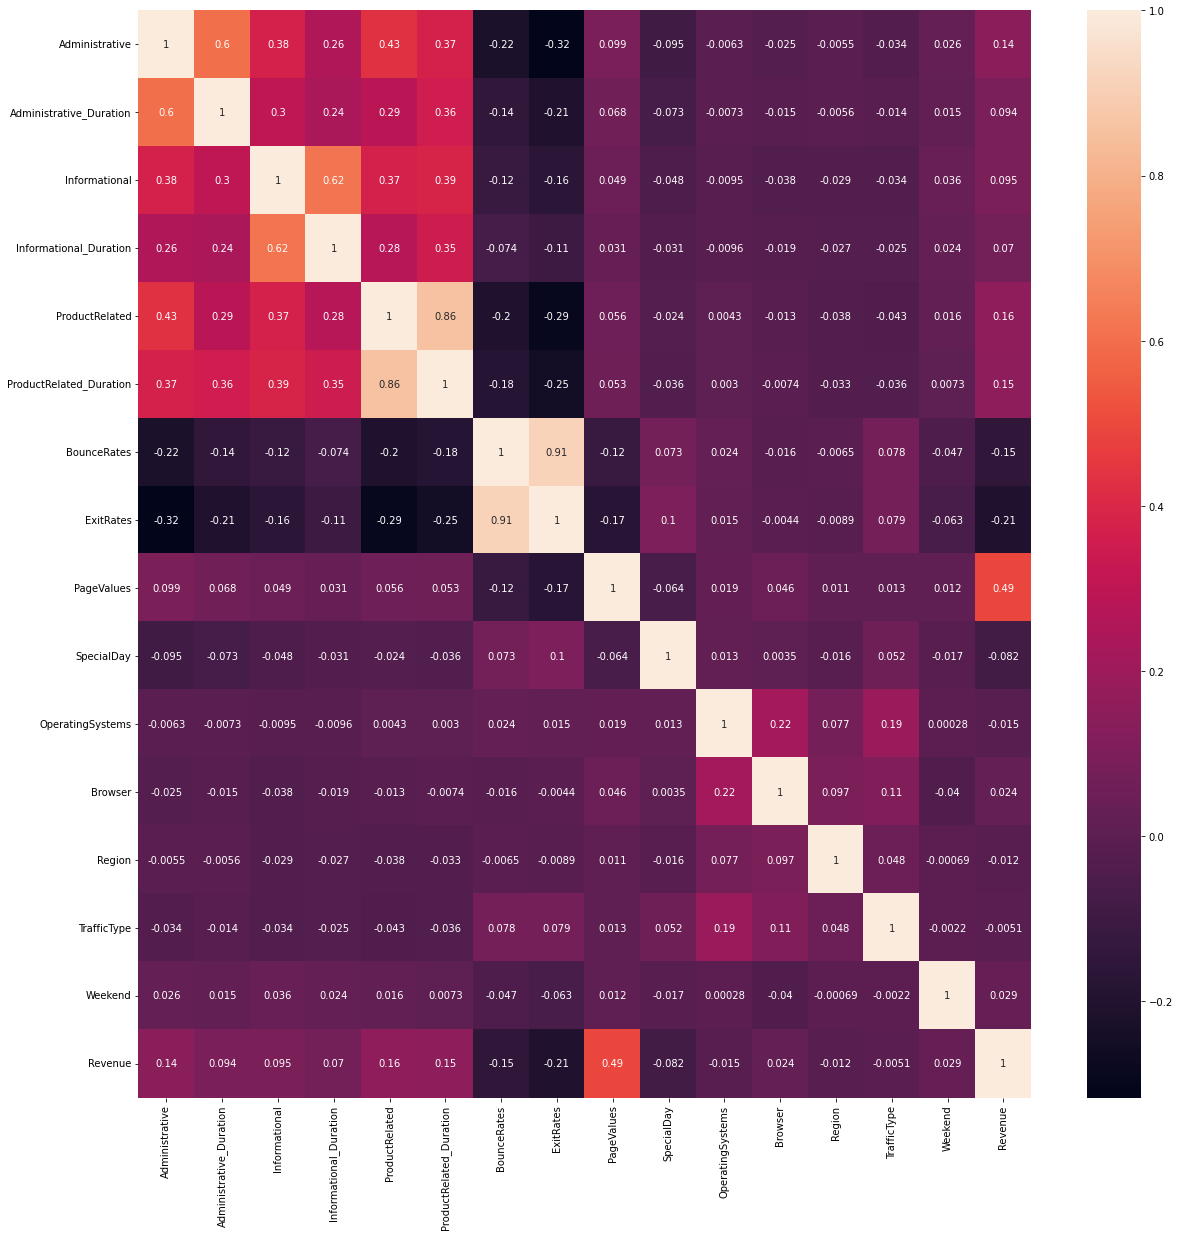

In [27]:
#Checking linear relation between the variables 


corr_matrix = Data.corr()
#Visiual Representation

import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot = True)
plt.show()

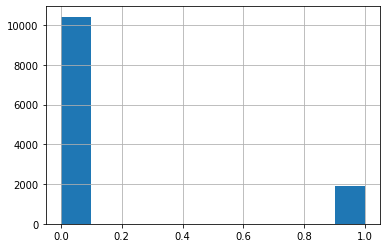

Data with output zero = 84.526% and Data with output one = 15.474%


In [28]:
#Checking the Balance of the Data
z = Data['Revenue'].value_counts()
false = z[0]/(z[0]+z[1])*100
true = 100-false
Data["Revenue"].hist()
plt.show()
print("Data with output zero = {:.3f}% and Data with output one = {:.3f}%" .format(false,true))

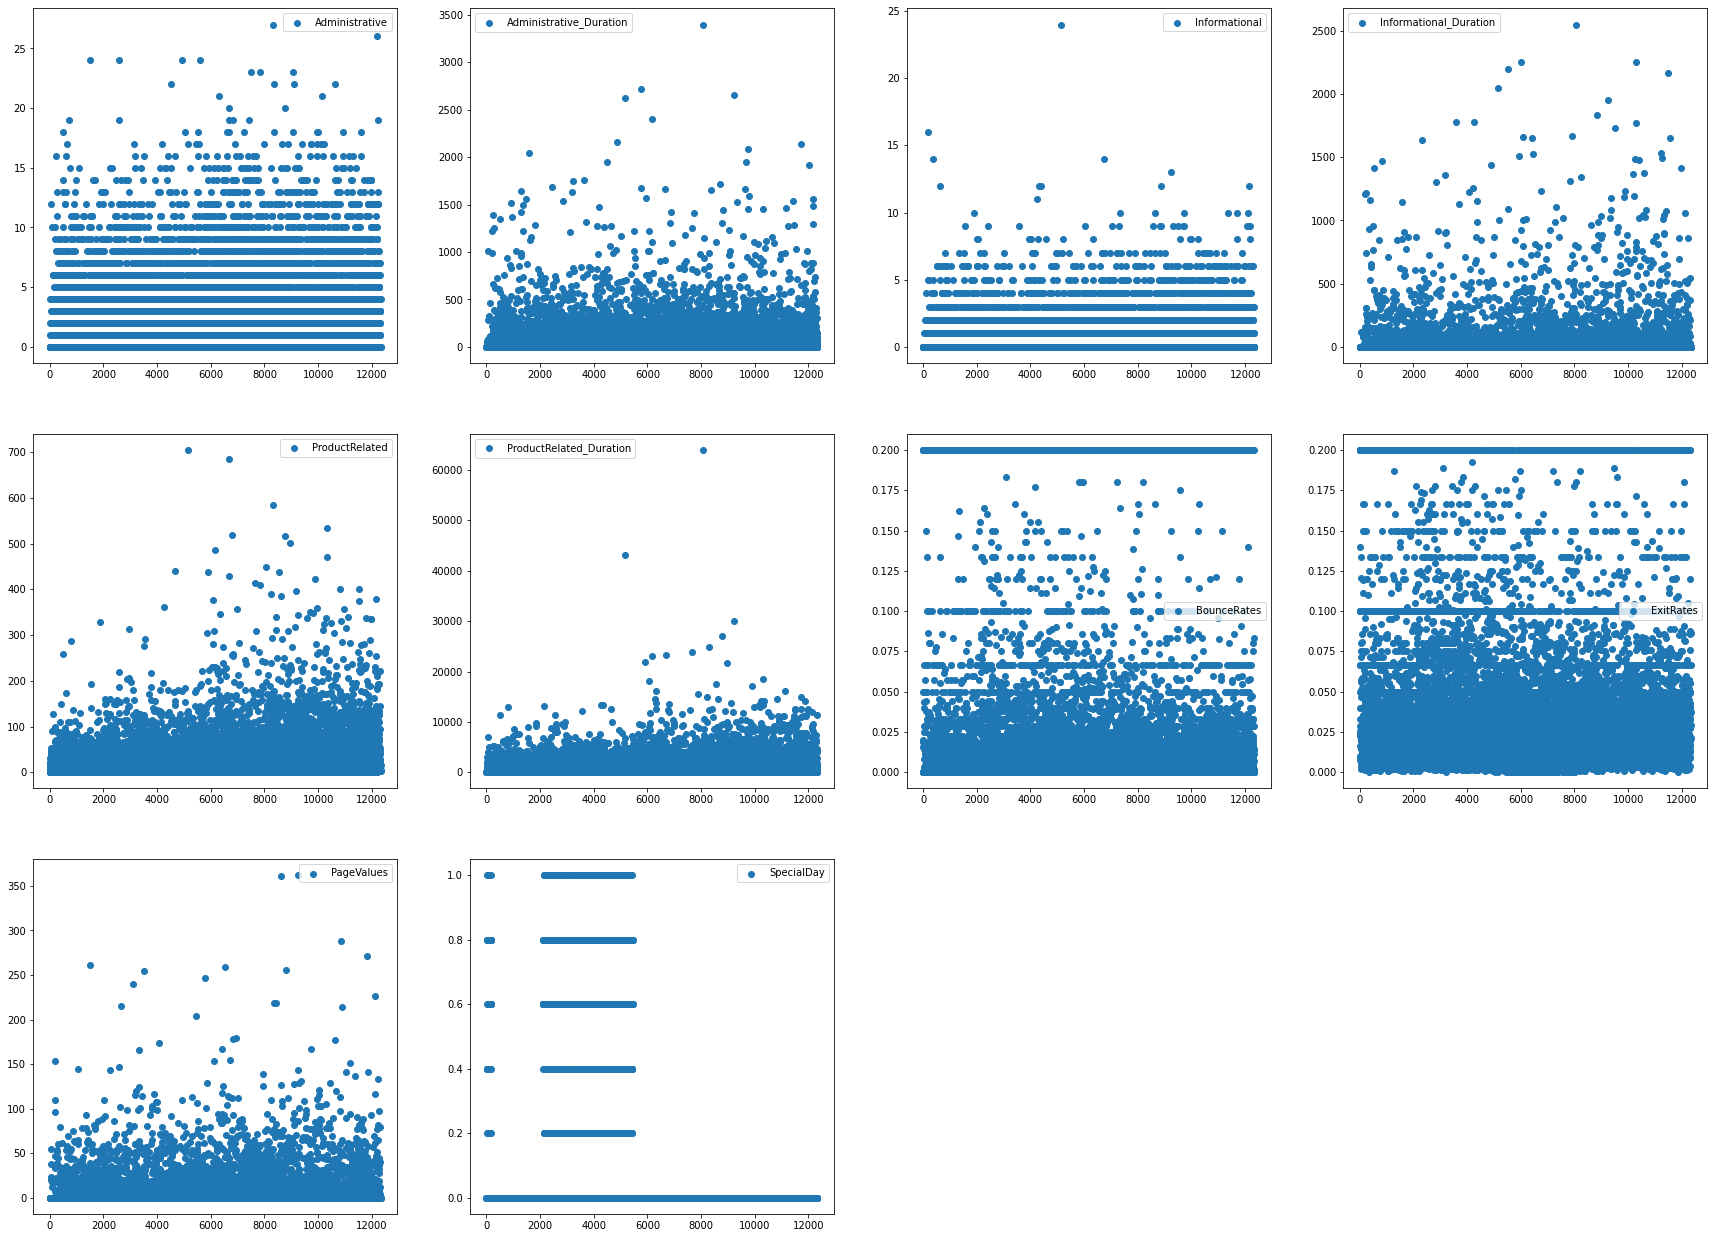

In [29]:
#Checking Outliers

Data_index = np.arange(0,12330,1).T

plt.figure(figsize=(30,30))

plt.subplot2grid((4,4), (0,0))
plt.scatter(Data_index, Data["Administrative"], label="Administrative")
plt.legend(loc='best')

plt.subplot2grid((4,4), (0,1))
plt.scatter(Data_index, Data["Administrative_Duration"], label="Administrative_Duration")
plt.legend(loc='best')

plt.subplot2grid((4,4), (0,2))
plt.scatter(Data_index, Data["Informational"], label="Informational")
plt.legend(loc='best')

plt.subplot2grid((4,4), (0,3))
plt.scatter(Data_index, Data["Informational_Duration"], label="Informational_Duration")
plt.legend(loc='best')

plt.subplot2grid((4,4), (1,0))
plt.scatter(Data_index, Data["ProductRelated"], label="ProductRelated")
plt.legend(loc='best')

plt.subplot2grid((4,4), (1,1))
plt.scatter(Data_index, Data["ProductRelated_Duration"], label="ProductRelated_Duration")
plt.legend(loc='best')

plt.subplot2grid((4,4), (1,2))
plt.scatter(Data_index, Data["BounceRates"], label="BounceRates")
plt.legend(loc='best')

plt.subplot2grid((4,4), (1,3))
plt.scatter(Data_index, Data["ExitRates"], label="ExitRates")
plt.legend(loc='best')

plt.subplot2grid((4,4), (2,0))
plt.scatter(Data_index, Data["PageValues"], label="PageValues")
plt.legend(loc='best')

plt.subplot2grid((4,4), (2,1))
plt.scatter(Data_index, Data["SpecialDay"], label="SpecialDay")
plt.legend(loc='best')

plt.show()

In [30]:
X = Data.drop(["Revenue"], axis=1)
Y = Data["Revenue"]

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [32]:
#--PIPELINE--#
#MODEL TRAINING 

def model_training(X, Model):
  # Defining Categorical and Numerical Data
  categorical_features = ['Month',	'OperatingSystems',	'Browser',	'Region',	'TrafficType',	'VisitorType']
  numeric_features = ['Administrative',	'Administrative_Duration',	'Informational',	'Informational_Duration',	'ProductRelated',
                    'ProductRelated_Duration', 'BounceRates',	'ExitRates',	'PageValues',	'SpecialDay', 'Weekend']

  numeric_method = MinMaxScaler()
  categorical_method = OneHotEncoder(drop='first', sparse=False)

  preprocessor = ColumnTransformer(
        transformers=[
            ('numeric', numeric_method, numeric_features),
            ('categorical', categorical_method, categorical_features),
            ], remainder='passthrough'
      )

  model_trained = imbpipeline(steps=[
                                      ('preprocessor', preprocessor),
                                      ('smote', SMOTE(random_state=1)),
                                      ('feature_selection', SelectKBest(score_func=f_classif, k=2)),
                                      ('model', model)
      ])

  return model_trained

In [33]:
model = LogisticRegression()
model_trained = model_training(X_train, model)
model_trained.fit(X_train, Y_train)
y_pred_LR = model_trained.predict(X_test)

In [34]:
print("Confusion Matrix of Logisitic Regression is,\n ",confusion_matrix(Y_test,y_pred_LR))
print("\nAccuracy Score: ", accuracy_score(Y_test, y_pred_LR))
print("Precision Score: ", precision_score(Y_test, y_pred_LR))
print("Recall Score:", recall_score(Y_test, y_pred_LR))
print("F1_Score: ", f1_score(Y_test, y_pred_LR))

Confusion Matrix of Logisitic Regression is,
  [[2906  218]
 [ 197  378]]

Accuracy Score:  0.8878075155447418
Precision Score:  0.6342281879194631
Recall Score: 0.6573913043478261
F1_Score:  0.645602049530316


In [35]:
model = RandomForestClassifier()
model_trained = model_training(X_train, model)
model_trained.fit(X_train, Y_train)
y_pred_rand = model_trained.predict(X_test)

In [36]:
print("Confusion Matrix of RandomForest is,\n ",confusion_matrix(Y_test,y_pred_rand))
print("\nAccuracy Score: ", accuracy_score(Y_test, y_pred_rand))
print("Precision Score: ", precision_score(Y_test, y_pred_rand))
print("Recall Score:", recall_score(Y_test, y_pred_rand))
print("F1_Score:", f1_score(Y_test, y_pred_rand))

Confusion Matrix of RandomForest is,
  [[2612  512]
 [ 112  463]]

Accuracy Score:  0.8313057583130575
Precision Score:  0.4748717948717949
Recall Score: 0.8052173913043478
F1_Score: 0.5974193548387096


In [37]:
model = SVC()
model_trained = model_training(X_train, model)
model_trained.fit(X_train, Y_train)
y_pred_SVC = model_trained.predict(X_test)

In [38]:
print("Confusion Matrix of SVC is,\n ",confusion_matrix(Y_test,y_pred_SVC))
print("\nAccuracy Score: ", accuracy_score(Y_test, y_pred_SVC))
print("Precision Score: ", precision_score(Y_test, y_pred_SVC))
print("Recall Score:", recall_score(Y_test, y_pred_SVC))
print("F1_Score:", f1_score(Y_test, y_pred_SVC))

Confusion Matrix of SVC is,
  [[2846  278]
 [ 163  412]]

Accuracy Score:  0.8807785888077859
Precision Score:  0.5971014492753624
Recall Score: 0.7165217391304348
F1_Score: 0.6513833992094862


In [39]:
model =  KNeighborsClassifier()
model_trained = model_training(X_train, model)
model_trained.fit(X_train, Y_train)
y_pred_KNN = model_trained.predict(X_test)

In [40]:
print("Confusion Matrix of KNN is,\n ",confusion_matrix(Y_test,y_pred_KNN))
print("\nAccuracy Score: ", accuracy_score(Y_test, y_pred_KNN))
print("Precision Score: ", precision_score(Y_test, y_pred_KNN))
print("Recall Score:", recall_score(Y_test, y_pred_KNN))
print("F1_Score:", f1_score(Y_test, y_pred_KNN))

Confusion Matrix of KNN is,
  [[2724  400]
 [ 123  452]]

Accuracy Score:  0.858610435252771
Precision Score:  0.5305164319248826
Recall Score: 0.7860869565217391
F1_Score: 0.6334968465311843


In [41]:
model =  DecisionTreeClassifier()
model_trained = model_training(X_train, model)
model_trained.fit(X_train, Y_train)
y_pred_DT = model_trained.predict(X_test)

In [42]:
print("Confusion Matrix of Decision Tree is,\n ",confusion_matrix(Y_test,y_pred_DT))
print("\nAccuracy Score: ", accuracy_score(Y_test, y_pred_DT))
print("Precision Score: ", precision_score(Y_test, y_pred_DT))
print("Recall Score:", recall_score(Y_test, y_pred_DT))
print("F1_Score:", f1_score(Y_test, y_pred_DT))

Confusion Matrix of Decision Tree is,
  [[2654  470]
 [ 146  429]]

Accuracy Score:  0.8334685050013517
Precision Score:  0.4771968854282536
Recall Score: 0.7460869565217392
F1_Score: 0.582089552238806
